# SparseEdges tests

## A series of tests for the SparseEdges package


Table of content

* [What is the SparseEdges package?](#What-is-the-SparseEdges-package?) 
* [Installing](#Installing) 
* [testing one step](#testing-one-step)


In [1]:
%load_ext autoreload
%autoreload 2

from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
np.set_printoptions(precision=4)#, suppress=True)

In [2]:
%cd -q ../probe

In [3]:
from NeuroTools.parameters import ParameterSet
from SLIP import Image
from LogGabor import LogGabor
from SparseEdges import SparseEdges

In [4]:
#! defining framework
#!-------------------
mp = SparseEdges('https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py')
mp.pe.N = 4
mp.pe.MP_alpha=1.
mp.pe.do_whitening = False

## Defining units, axis and conventions

cardinal points in X, Y (clockwise):  E (=right=3 o'clock=horizontal), ESE, S, WSW, W, WNW, N, ENE :

In [5]:
X = np.array([0, 1./4, 1./2, 1./4, 0, -1./4, -1./2])#, -1./4])\n",
Y = np.array([1./2, np.sqrt(3)/4, 0, -np.sqrt(3)/4, -1./2, -np.sqrt(3)/4, 0.])#, np.sqrt(3)/
Theta = np.arctan2(-X, Y)  # perpendicular to circle
Theta = ((Theta + np.pi/2  - np.pi/mp.pe.N_phi/2 ) % (np.pi)) - np.pi/2  + np.pi/mp.pe.N_phi/2
print(['%0.1f' % (angle*180/np.pi) for angle in Theta])

['-0.0', '-30.0', '90.0', '30.0', '-0.0', '-30.0', '90.0']


We set the [0,0] index of the array in the upper left left corner of the axes.

The X, Y image axis are defined in the matrix style (origin on the upper left; X going vertically down, Y going right horizontally) - the angle is defined as the angle wrt to the horizontal axis :

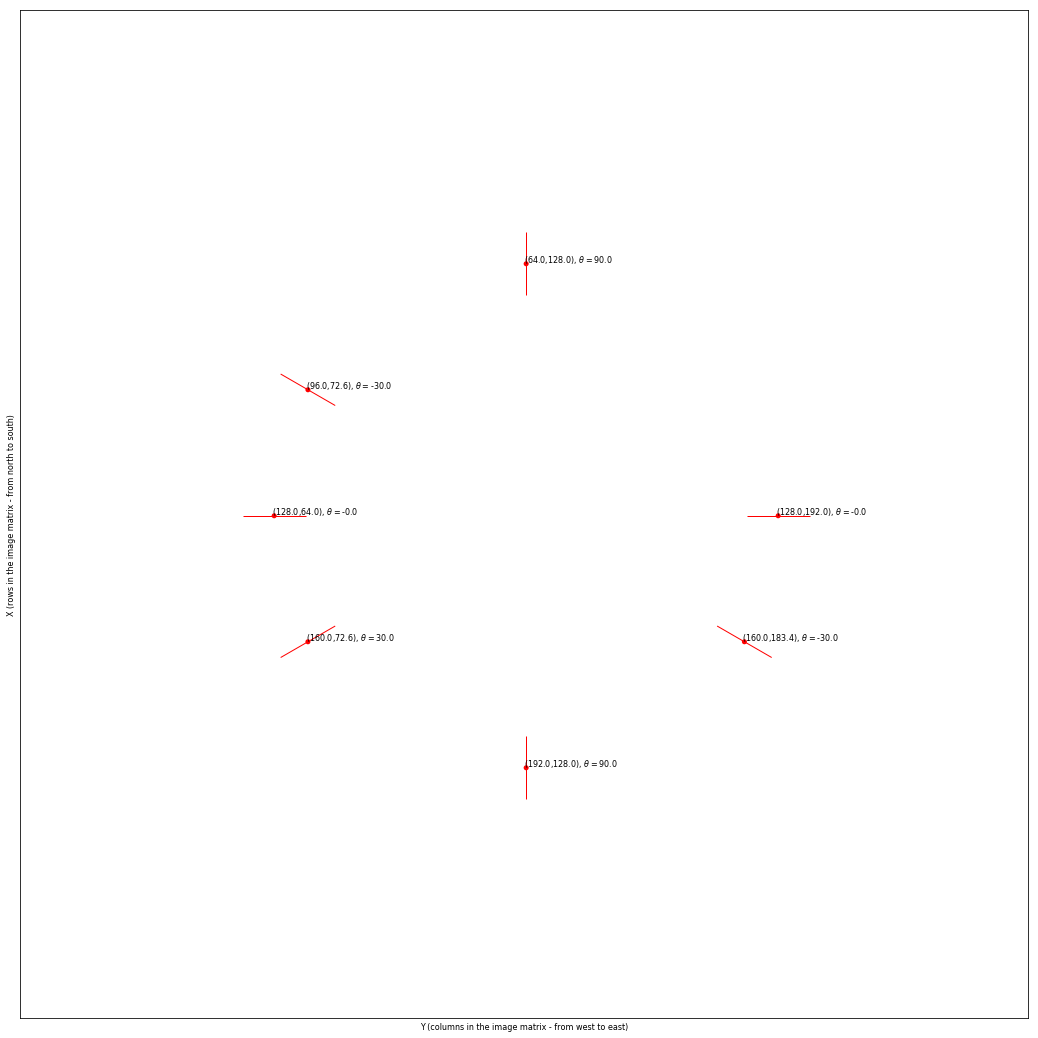

In [6]:
fig, a = mp.show_edges(np.vstack(((X/2. + .5)*mp.pe.N_X, (Y/2. + .5)*mp.pe.N_X, Theta, .1*np.ones(X.shape), np.ones(X.shape), np.zeros(X.shape) )))
t = [a.text(Y_, X_, r'(%0.1f,%0.1f), $\theta=$%0.1f' % (X_, Y_, angle*180/np.pi))  for (X_, Y_, angle)  in zip((X/2. + .5)*mp.pe.N_X, (Y/2. + .5)*mp.pe.N_X, Theta)]
a.set_xlabel('Y (columns in the image matrix - from west to east)')
_ = a.set_ylabel('X (rows in the image matrix - from north to south)')

Overlaying an image :

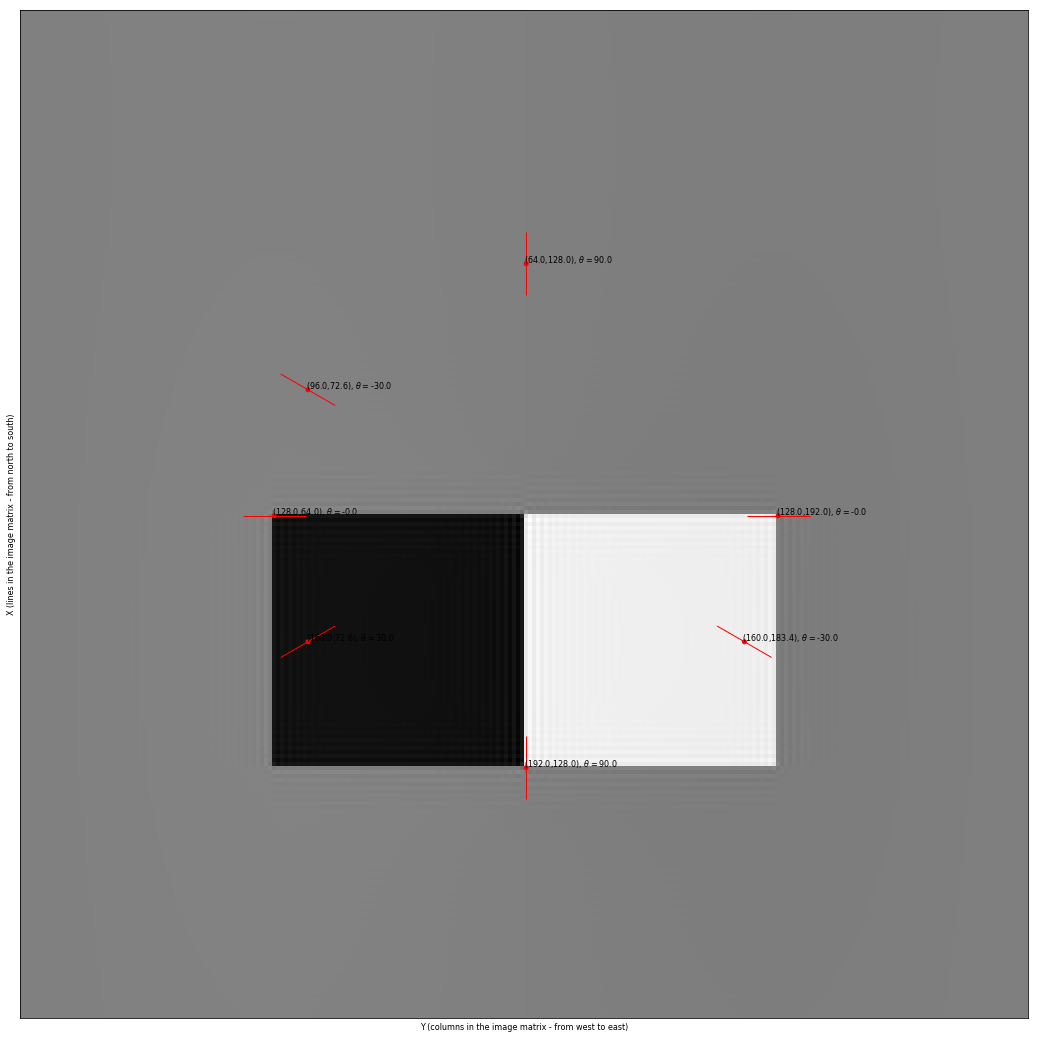

In [7]:
mp = SparseEdges('https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py')
mp.pe.N = 128 # number of edges
mp.pe.figsize_edges = 9

#! defining a reference test image (see test_Image)
image = np.zeros((mp.pe.N_X, mp.pe.N_Y))
image[mp.pe.N_X//2:mp.pe.N_X//2+mp.pe.N_X//4, mp.pe.N_X//2:mp.pe.N_X//2+mp.pe.N_X//4] = 1
image[mp.pe.N_X//2:mp.pe.N_X//2+mp.pe.N_X//4, mp.pe.N_X//4:mp.pe.N_X//2] = -1

edges = np.vstack(((X/2. + .5)*mp.pe.N_X, (Y/2. + .5)*mp.pe.N_X, Theta, .1*np.ones(X.shape), np.ones(X.shape), np.zeros(X.shape) ))

fig, a = mp.show_edges(edges, image=image)
#fig, a = mp.show_edges(edges, image=im.whitening(image))
t = [a.text(Y_, X_, r'(%0.1f,%0.1f), $\theta=$%0.1f' % (X_, Y_, angle*180/np.pi))  for (X_, Y_, angle)  in zip((X/2. + .5)*mp.pe.N_X, (Y/2. + .5)*mp.pe.N_X, Theta)]
a.set_xlabel('Y (columns in the image matrix - from west to east)')
_ = a.set_ylabel('X (lines in the image matrix - from north to south)')

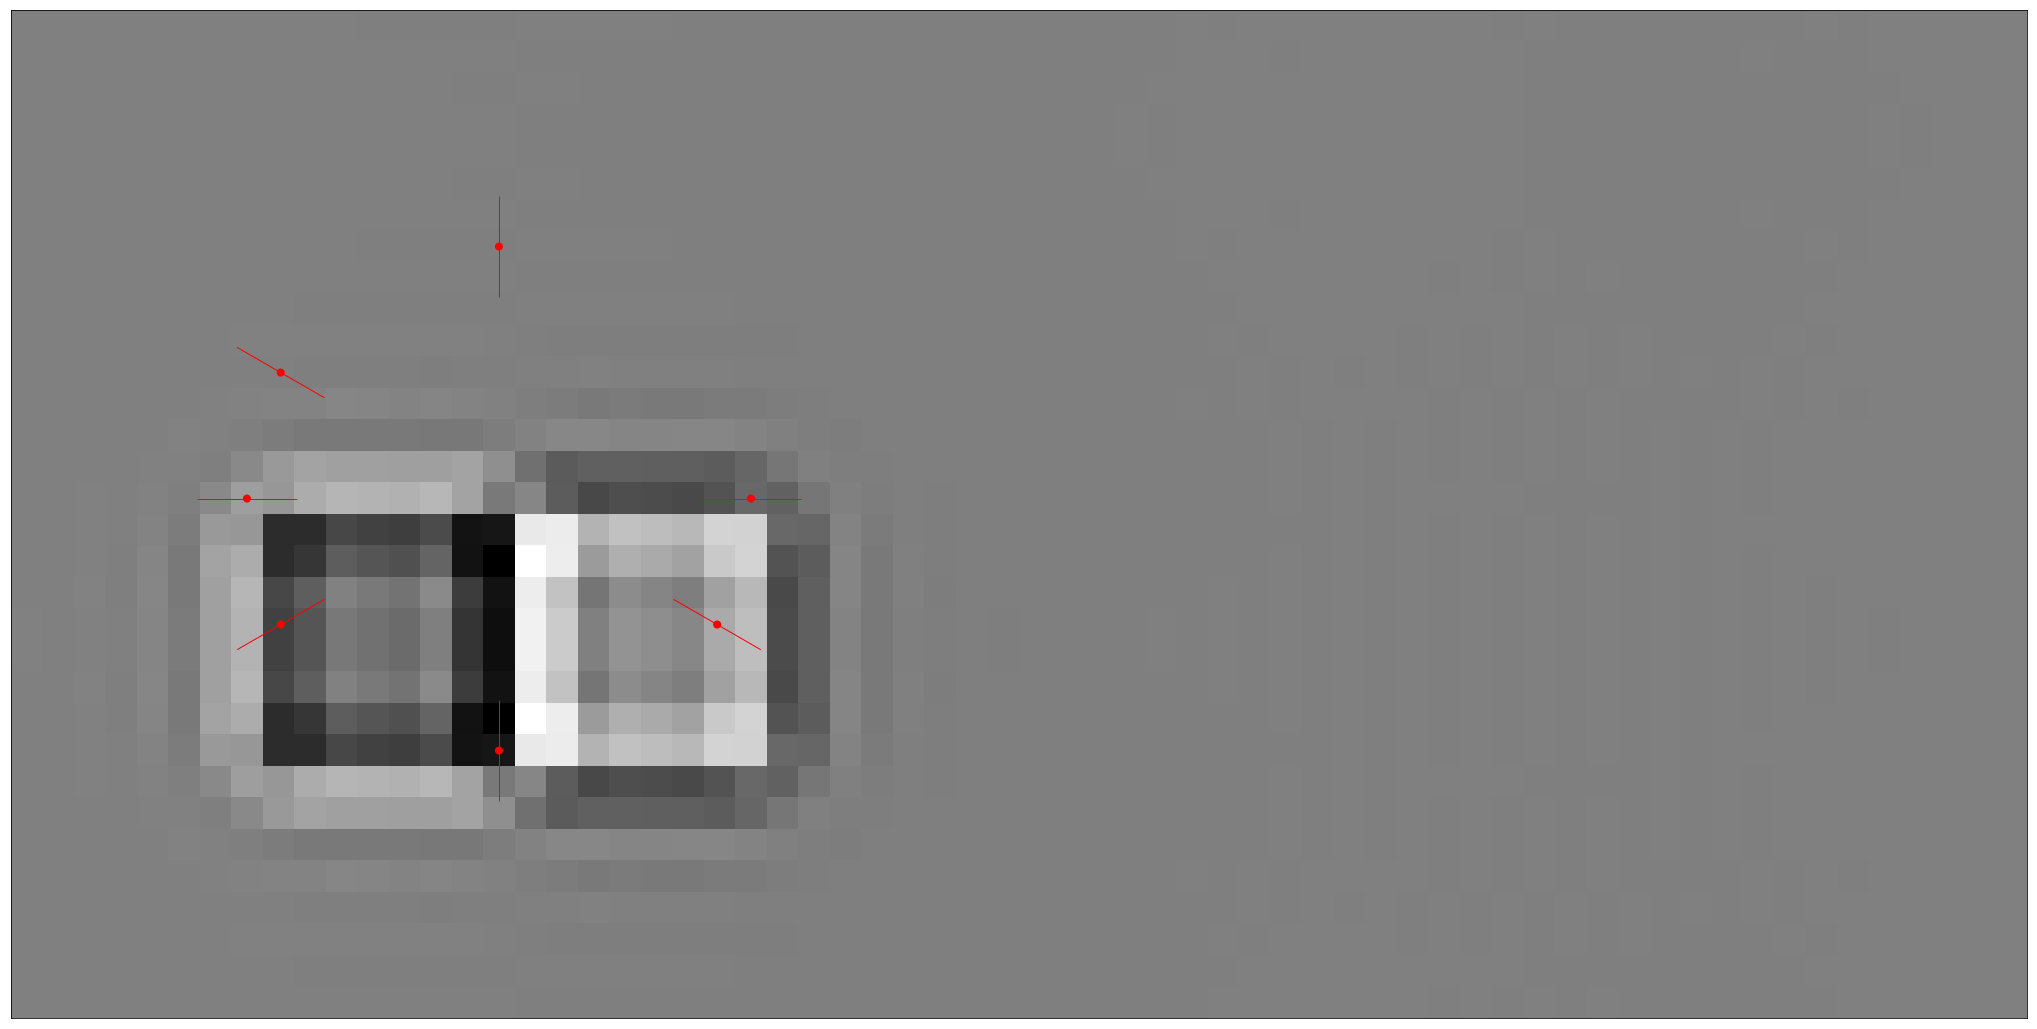

In [8]:
mp = SparseEdges('https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py')
mp.set_size((32, 64))
mp.pe.N = 128 # number of edges
mp.pe.figsize_edges = 4.5

#! defining a reference test image (see test_Image)
image = np.zeros((mp.pe.N_X, mp.pe.N_Y))
image[mp.pe.N_X//2:mp.pe.N_X//2+mp.pe.N_X//4, mp.pe.N_X//2:mp.pe.N_X//2+mp.pe.N_X//4] = 1
image[mp.pe.N_X//2:mp.pe.N_X//2+mp.pe.N_X//4, mp.pe.N_X//4:mp.pe.N_X//2] = -1

edges = np.vstack(((X/2. + .5)*mp.pe.N_X-1, (Y/2. + .5)*mp.pe.N_X-1, Theta, .5*np.ones(X.shape), np.ones(X.shape), np.zeros(X.shape) ))

fig, a = mp.show_edges(edges, image=mp.whitening(image))

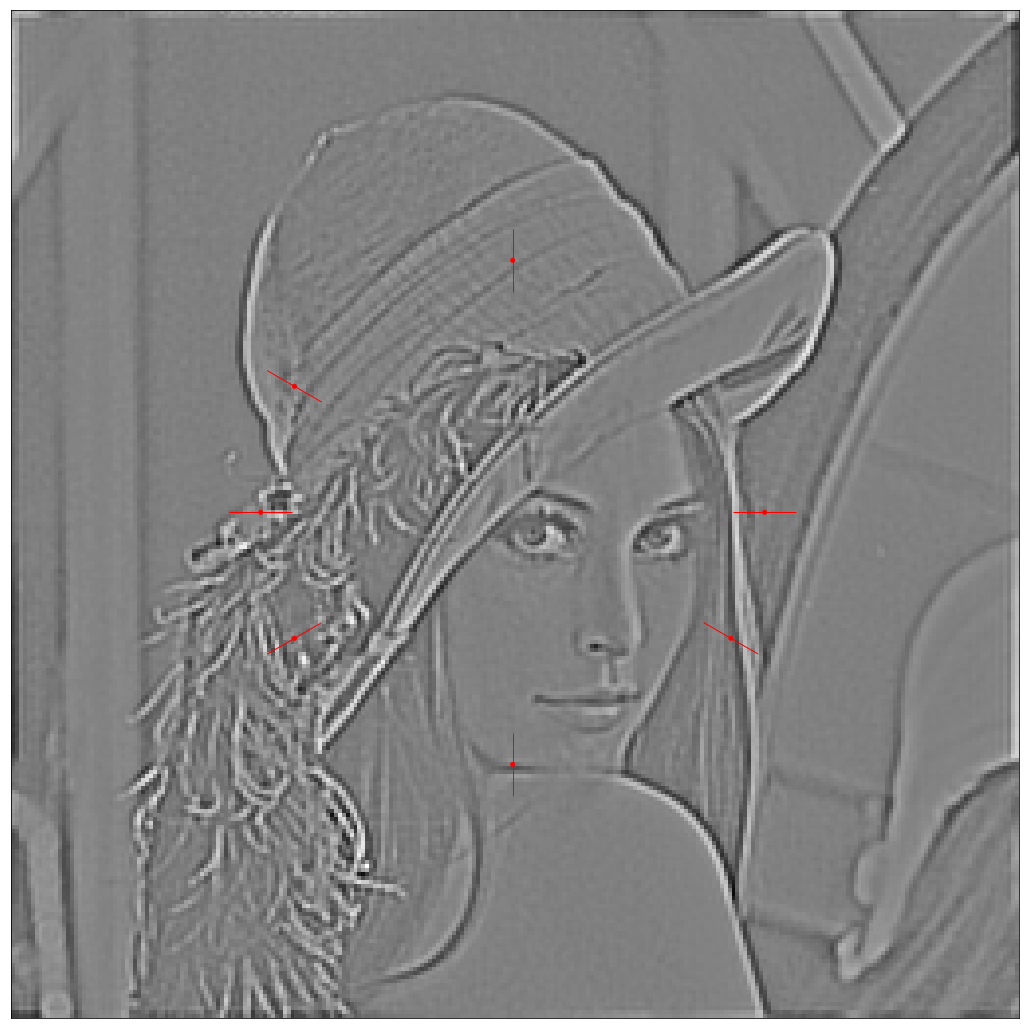

In [9]:
mp.set_size((256, 256))
image = mp.imread('../../SLIP/database/lena256.png')
mp.pe.N = 128 # number of edges
mp.pe.figsize_edges = 9

edges = np.vstack(((X/2. + .5)*mp.pe.N_X-1, (Y/2. + .5)*mp.pe.N_X-1, Theta, .1*np.ones(X.shape), np.ones(X.shape), np.zeros(X.shape) ))

fig, a = mp.show_edges(edges, image=mp.whitening(image))

## Matching Pursuit

### checking basic edge detection

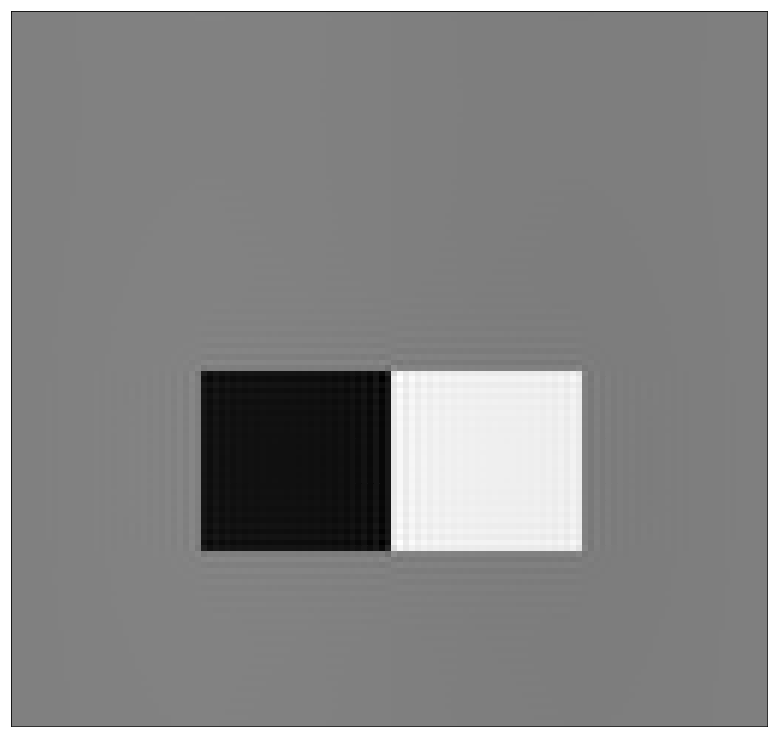

In [10]:
mp.set_size((128, 128))
#! defining a reference test image (see test_Image)
image = np.zeros((mp.pe.N_X, mp.pe.N_Y))
image[mp.pe.N_X//2:mp.pe.N_X//2+mp.pe.N_X//4, mp.pe.N_X//2:mp.pe.N_X//2+mp.pe.N_X//4] = 1
image[mp.pe.N_X//2:mp.pe.N_X//2+mp.pe.N_X//4, mp.pe.N_X//4:mp.pe.N_X//2] = -1
mp.imshow(image);

In [11]:
%%writefile experiment_test_MP.py
import numpy as np
from SparseEdges import SparseEdges

mp = SparseEdges('https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py')
mp.pe.N = 128 # number of edges
mp.pe.figsize_edges = 9

#! defining a reference test image (see test_Image)
image = np.zeros((mp.pe.N_X, mp.pe.N_Y))
image[mp.pe.N_X//2:mp.pe.N_X//2+mp.pe.N_X//4, mp.pe.N_X//2:mp.pe.N_X//2+mp.pe.N_X//4] = 1
image[mp.pe.N_X//2:mp.pe.N_X//2+mp.pe.N_X//4, mp.pe.N_X//4:mp.pe.N_X//2] = -1

import os
matname = os.path.join(mp.pe.matpath, 'experiment_test_MP.npy')
try:
    edges = np.load(matname)
except Exception:
    edges, C_res = mp.run_mp(image, verbose=True)
    try:
        os.mkdir(mp.pe.matpath)
    except Exception:
        pass
    np.save(matname, edges)   


Overwriting experiment_test_MP.py


In [12]:
%run experiment_test_MP.py

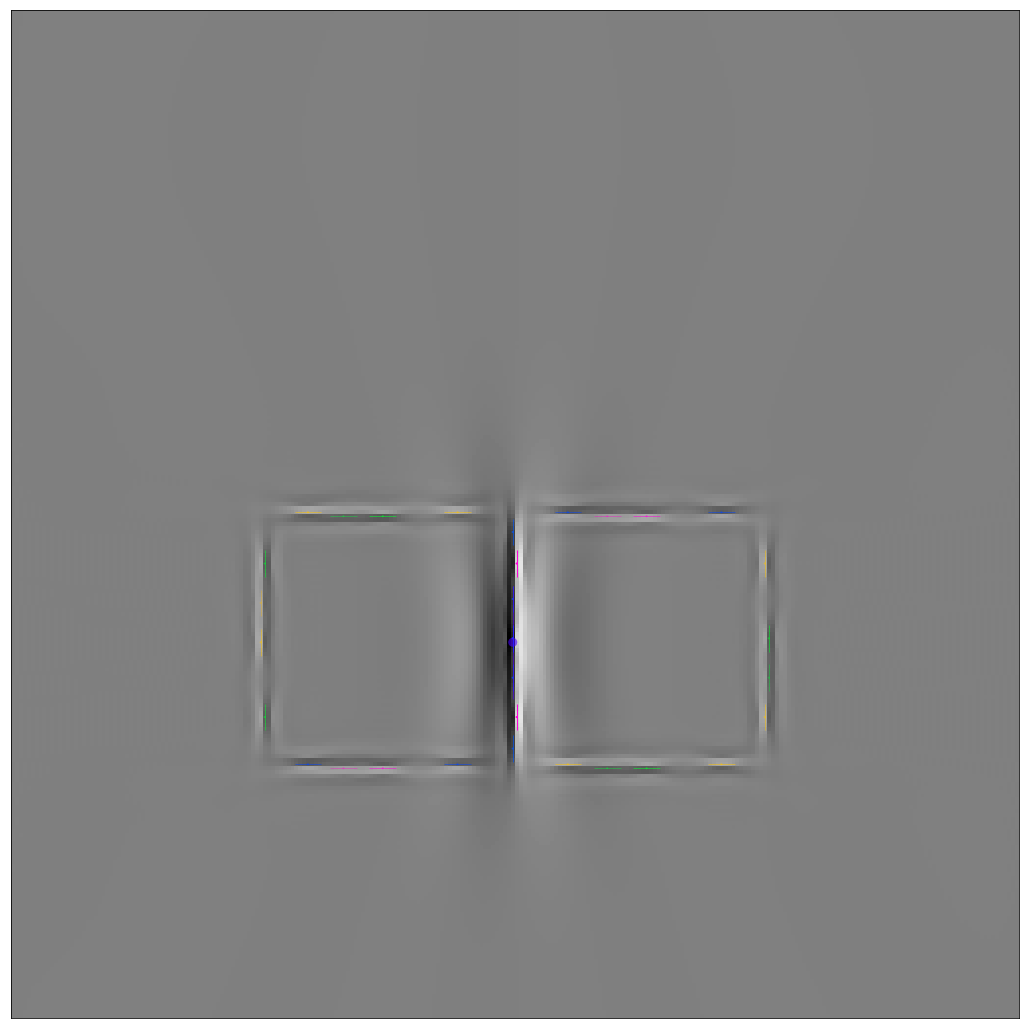

In [13]:
#fig, a = mp.show_edges(edges, image=mp.whitening(image))
fig, a = mp.show_edges(edges, image=mp.dewhitening(mp.reconstruct(edges)))

In [14]:
%%writefile experiment_test_whitening.py
import numpy as np
from SparseEdges import SparseEdges
mp = SparseEdges('https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py')
mp.pe.N = 256

image = mp.imread('https://raw.githubusercontent.com/bicv/SLIP/master/database/serre07_targets/B_N107001.jpg')

#print image.mean(), image.std()
image = mp.normalize(image, center=True)
#print image.mean(), image.std()
import os
matname = os.path.join(mp.pe.matpath, 'experiment_test_whitening.npy')
try:
    edges = np.load(matname)
except Exception:
    edges, C_res = mp.run_mp(image, verbose=True)
    np.save(matname, edges)    


matname_RMSE = os.path.join(mp.pe.matpath, 'experiment_test_whitening_RMSE.npy')
try:
    RMSE = np.load(matname_RMSE)
except Exception:
    RMSE = np.ones(mp.pe.N)
    image_ = image.copy()
    image_rec = np.zeros_like(image_)
    if mp.pe.do_whitening: image_ = mp.whitening(image_)
    for i_N in range(mp.pe.N):
        image_rec += mp.reconstruct(edges[:, i_N][:, np.newaxis])
        RMSE[i_N] =  ((image_*mp.mask-image_rec*mp.mask)**2).sum()

    np.save(matname_RMSE, RMSE)     


Overwriting experiment_test_whitening.py


In [15]:
%run experiment_test_whitening.py

In [16]:
!ls -l  data_cache/experiment_test_whitening.npy data_cache/experiment_test_whitening_RMSE.npy

-rw-r--r--  1 lolo  staff  6224 Oct  6 12:30 data_cache/experiment_test_whitening.npy
-rw-r--r--  1 lolo  staff  1104 Oct  6 12:30 data_cache/experiment_test_whitening_RMSE.npy


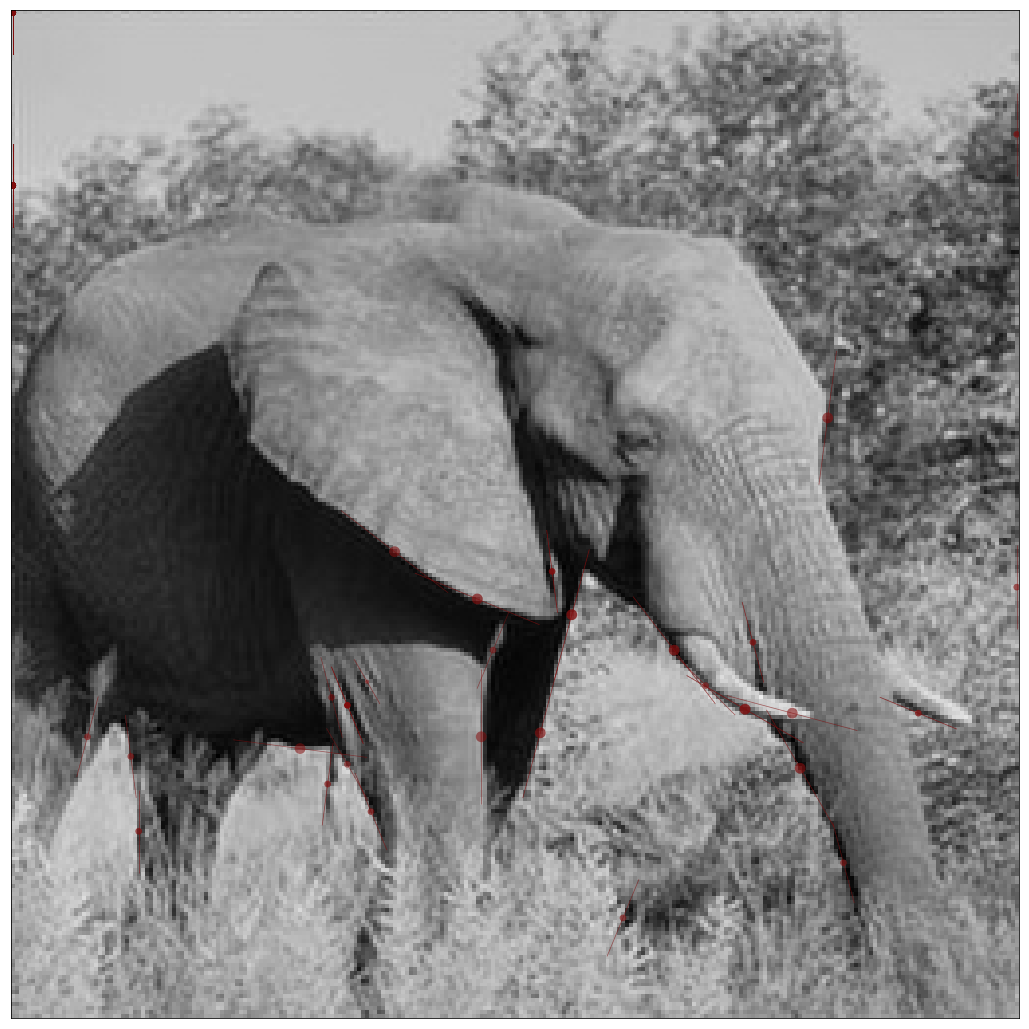

In [17]:
#edges[0, :] = pe.N_X - edges[0,:] # HACK
#edges[2, :] = - edges[2,:] # HACK
#edges[:, 119] = edges[:, 118] # HACK
fig_width_pt = 318.670  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
fig_width = fig_width_pt*inches_per_pt  # width in inches
mp.pe.figsize_edges = .382 * fig_width
fig, a = mp.show_edges(edges, image=image, color='brown', show_phase=False) #, pedestal=.0, gamma=.3
import os
fig.savefig(os.path.join(mp.pe.figpath, 'SparseLets_A.pdf'))

RMSE-W =  0.899320899493


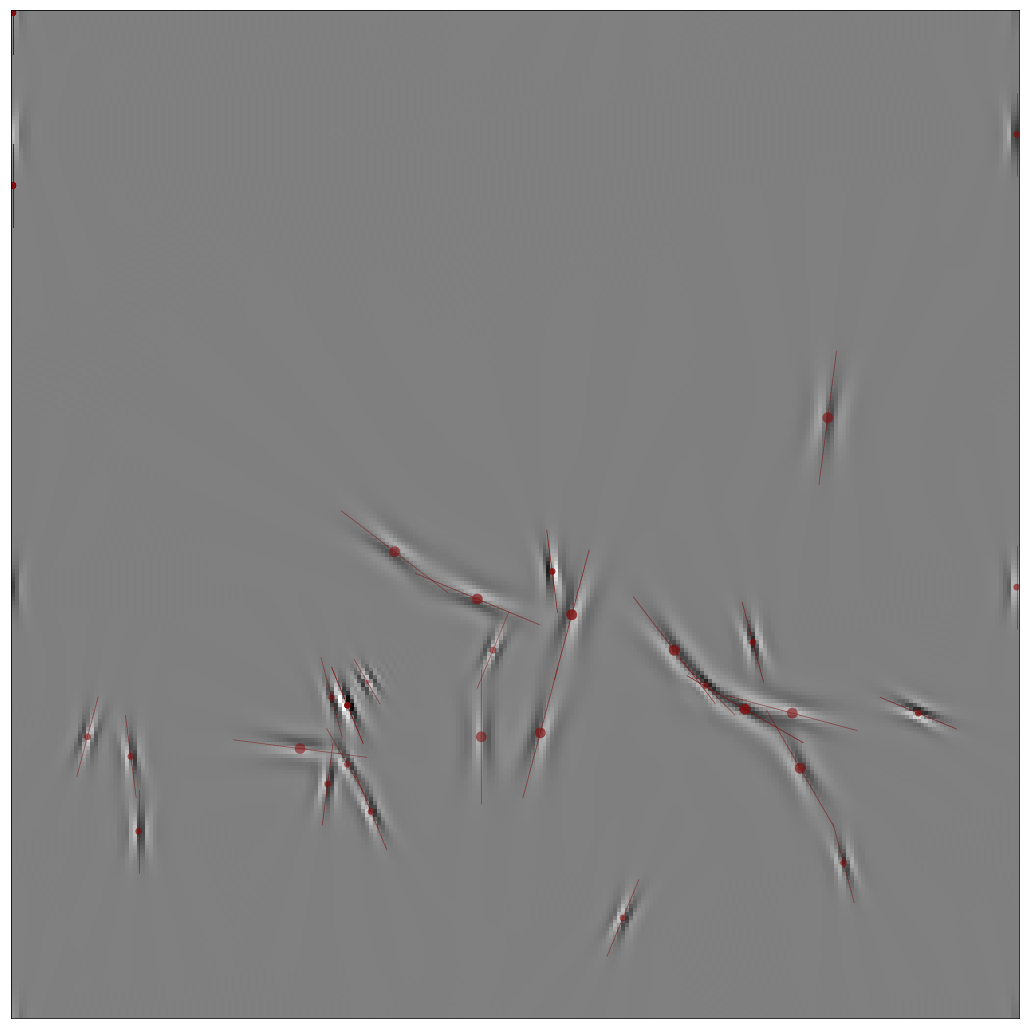

In [18]:
#! recontructing the image from the edges
image_rec = mp.reconstruct(edges)
print('RMSE-W = ', ((mp.whitening(image)-image_rec)**2).sum()/((mp.whitening(image))**2).sum())
fig, a = mp.show_edges(edges, image=image_rec*1., color='brown')

Recontructing the original image by dewhitening the reconstructed image:

RMSE-W =  0.899320899493


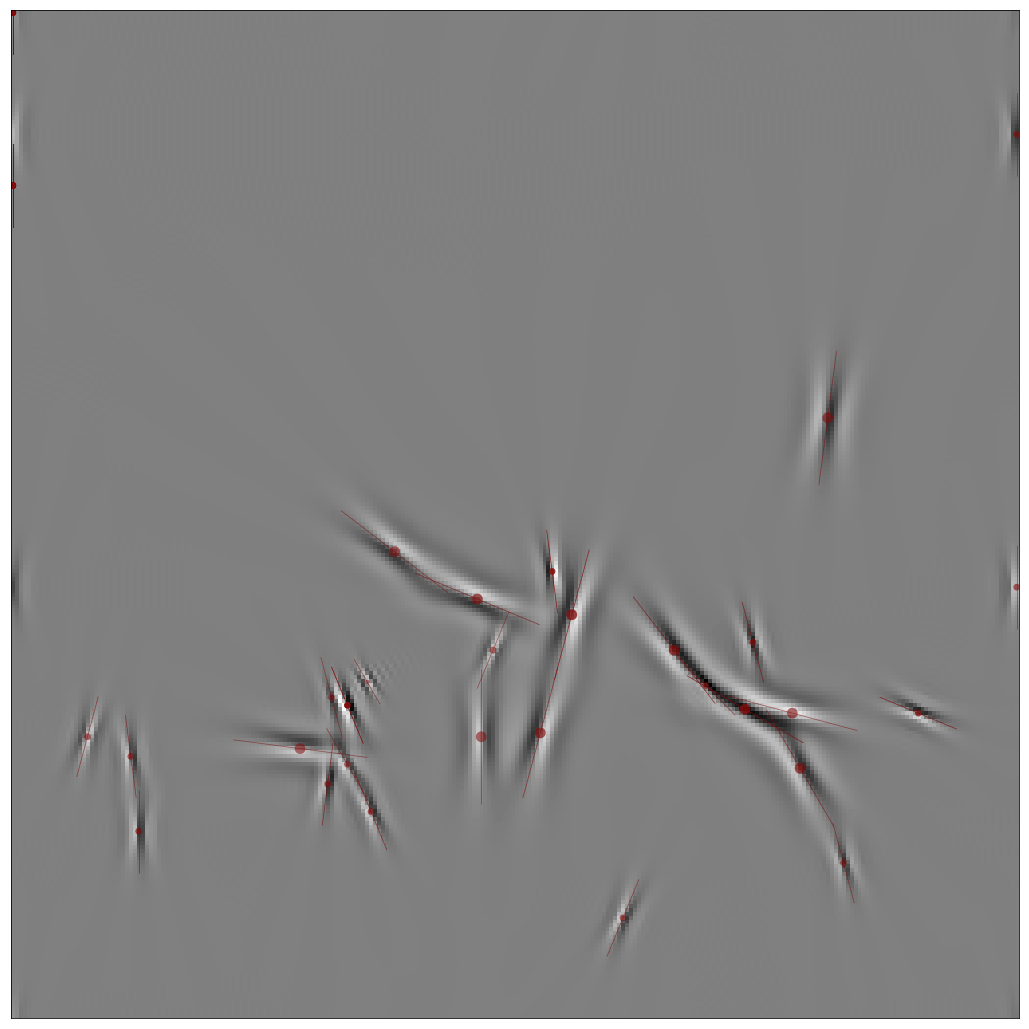

In [19]:
print('RMSE-W = ', ((mp.whitening(image)-image_rec)**2).sum()/((mp.whitening(image))**2).sum())
fig, a = mp.show_edges(edges, image=mp.dewhitening(image_rec)*1., color='brown')

In [20]:
#    RMSE = np.ones(pe.N)
#    for i_N in range(1, pe.N):
#        image_ = mp.reconstruct(edges[:, :i_N])
#        RMSE[i_N] =  ((image_W-image_)**2).sum() / RMSE_0
RMSE = np.load(os.path.join(mp.pe.matpath, 'experiment_test_whitening_RMSE.npy'))
print(RMSE.shape, mp.pe.N)

(128,) 256


In [21]:
# checking the quick computation of the RMSE in MP
image_W = mp.whitening(image)
RMSE_0 = (image_W**2).sum()
print(image_W.mean(), image_W.std(), np.sqrt(RMSE_0), np.sqrt(RMSE[0]))
    

RMSE_MP = np.ones(mp.pe.N)
RMSE_MP[1:] = 1. - np.cumsum(edges[4, :-1]**2) * (2 -  mp.pe.MP_alpha)/mp.pe.MP_alpha / RMSE_0

plt.figure(figsize=(12,6))
plt.subplot(111)
plt.plot(RMSE/RMSE[0], 'ro', label='true')
plt.plot(RMSE_MP, 'g--', label='MP-vec')
plt.legend()

-5.86499165206e-16 0.183764309115 47.0436631335 24.703324882


ValueError: could not broadcast input array from shape (127) into shape (255)

In [ ]:
%%writefile experiment_test_nowhitening.py
import numpy as np
from SparseEdges import SparseEdges
mp = SparseEdges('https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py')
mp.pe.N = 256

#image = mp.imread('https://raw.githubusercontent.com/bicv/SLIP/master/database/serre07_targets/B_N107001.jpg')
image = mp.imread('../../SLIP/database/serre07_targets/B_N107001.jpg')


mp.pe.figsize_edges = 9
image = mp.normalize(image, center=True)

#! trying now using no whitening of the image
mp.pe.do_whitening = False

import os
matname = os.path.join(mp.pe.matpath, 'experiment_test_nowhitening.npy')
matname_RMSE = os.path.join(mp.pe.matpath, 'experiment_test_nowhitening_RMSE.npy')
try:
    edges = np.load(matname)
except Exception:
    edges, C_res = mp.run_mp(image, verbose=True)
    np.save(matname, edges)    
    
fig, a = mp.show_edges(edges, image=image, mask=True)

In [ ]:
%run experiment_test_nowhitening.py


In [ ]:
#! recontructing the image from the edges
image_ = mp.reconstruct(edges)
print('RMSE = ', ((image-image_)**2).sum()/((image)**2).sum())
fig, a = mp.show_edges(edges, image=image_*1., mask=True)

### Perspectives: Better fits of the filters

Basically, it is possible to infer the best possible log-Gabor function, even if it's parameters do not fall on the grid

In [ ]:
mp = SparseEdges('https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py')
import scipy.optimize as opt

def twoD_Gaussian(xy, x_pos, y_pos, theta, sf_0):
    FT_lg = mp.loggabor(x_pos, y_pos, sf_0=np.absolute(sf_0), B_sf=mp.pe.B_sf, theta=theta, B_theta=mp.pe.B_theta)
    return mp.invert(FT_lg).ravel()

# Create x and y indices
x = np.arange(mp.pe.N_X)
y = np.arange(mp.pe.N_Y)
x, y = xy =  np.meshgrid(x, y)

#create data
x_pos, y_pos, theta, sf_0  = 23., 42., 142 * np.pi / 180., .01
x_pos, y_pos, theta, sf_0  = 23.6, 42.5, 12 * np.pi / 180., .01
print( sf_0)
data = twoD_Gaussian(xy, x_pos, y_pos, theta=theta, sf_0=sf_0)


# plot twoD_Gaussian data generated above
plt.figure()
plt.imshow(data.reshape(mp.pe.N_X, mp.pe.N_Y))
plt.colorbar()

# add some noise to the data and try to fit the data generated beforehand
data_noisy = data + 0.001*np.random.normal(size=data.shape)
# getting best match
C = mp.linear_pyramid(data_noisy.reshape(mp.pe.N_X, mp.pe.N_Y))
idx = mp.argmax(C)
initial_guess = [idx[0], idx[1], mp.theta[idx[2]], mp.sf_0[idx[3]]]
print ('initial_guess :', initial_guess, ', idx :', idx)

popt, pcov = opt.curve_fit(twoD_Gaussian, xy, data_noisy, p0=initial_guess)

data_fitted = twoD_Gaussian(xy, *popt)

extent = (0, mp.pe.N_X, 0, mp.pe.N_Y)
print ('popt :', popt, ', true : ', x_pos, y_pos, theta, sf_0)
fig, ax = plt.subplots(1, 1)
ax.hold(True)
ax.imshow(data_noisy.reshape(mp.pe.N_X, mp.pe.N_Y), cmap=plt.cm.jet, extent=extent)
_ = ax.contour(data_fitted.reshape(mp.pe.N_X, mp.pe.N_Y), 8, colors='w', extent=extent)

# TODO use a MLE to do the fit directly without scipy

## bonus: generating an unique seed for a given filename

In [ ]:
# imagelist, edgeslist, RMSE = mp.process(exp='testing_vanilla', name_database='serre07_distractors')
# take one instance:
# filename, croparea  =  imagelist[0]
filename = 'https://raw.githubusercontent.com/bicv/SLIP/master/database/serre07_targets/B_N107001.jpg'
#print (filename,croparea, filename+str(croparea))
import os
import hashlib
str_ = filename #+ str(croparea)
hashlib.sha224(str_.encode('utf-8')).hexdigest()

In [ ]:
int("0x" +  hashlib.sha224((str_).encode('utf-8')).hexdigest(), 0)

In [ ]:
np.random.seed(seed=int(int("0x" +  hashlib.sha224(str_.encode('utf-8')).hexdigest(), 0)*1. % 4294967295))

## some book keeping for the notebook

In [ ]:
%load_ext watermark
%watermark

In [ ]:
%load_ext version_information
%version_information numpy, scipy, matplotlib, sympy, pillow, imageio

In [ ]:
%cd -q ../notebooks